In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

train_dir = 'train'
test_dir = 'test'

train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Adding custom layers on top of base model
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)


Found 3250 images belonging to 5 classes.
Found 530 images belonging to 5 classes.
Epoch 1/10


C:\Users\bonde\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


102/102 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.5833 - loss: 21.1064 - val_accuracy: 0.8113 - val_loss: 0.5831
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7563 - loss: 0.7462 - val_accuracy: 0.8547 - val_loss: 0.4456
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.7995 - loss: 0.5565 - val_accuracy: 0.8660 - val_loss: 0.4515
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.7992 - loss: 0.5783 - val_accuracy: 0.8679 - val_loss: 0.4114
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.8017 - loss: 0.5164 - val_accuracy: 0.8679 - val_loss: 0.4061
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.8113 - loss: 0.5233 - val_accuracy: 0.8509 - val_loss: 0.4626
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.8149 - loss: 0.5099 - val_accuracy: 0.8623 - val_loss: 0.4537
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.8176 - loss: 0.5155 - val_accuracy: 0.87

NameError: name 'np' is not defined

17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 709ms/step - accuracy: 0.8918 - loss: 0.3633
Test Accuracy: 0.8754717111587524
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step


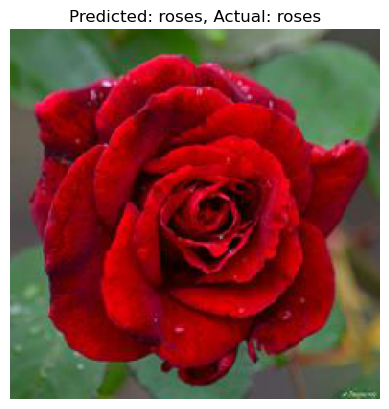

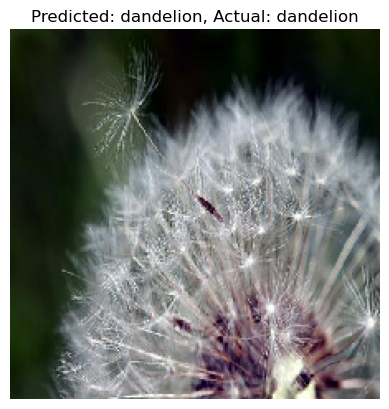

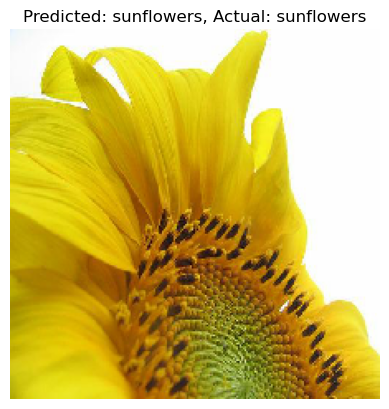

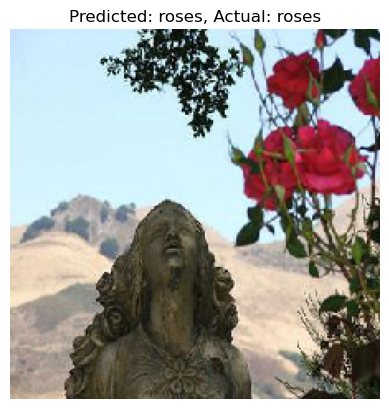

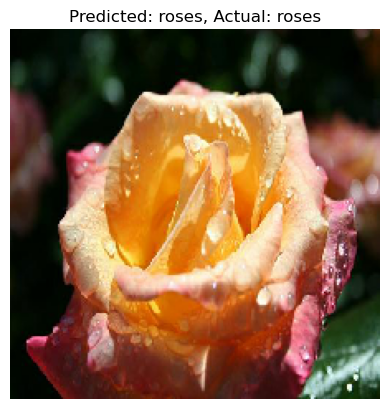

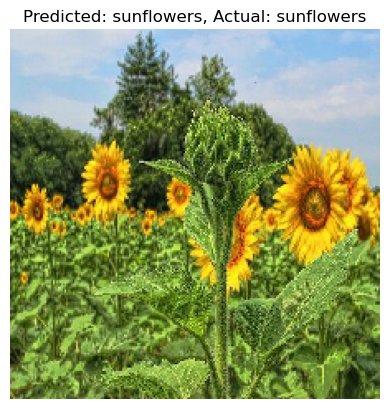

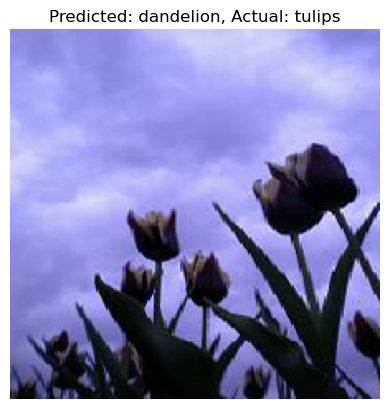

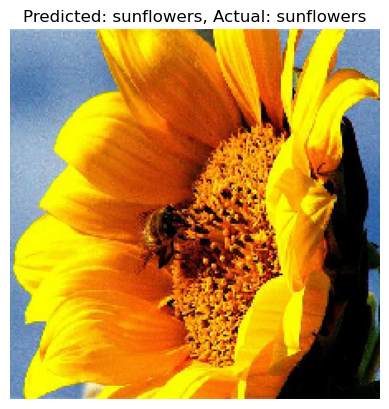

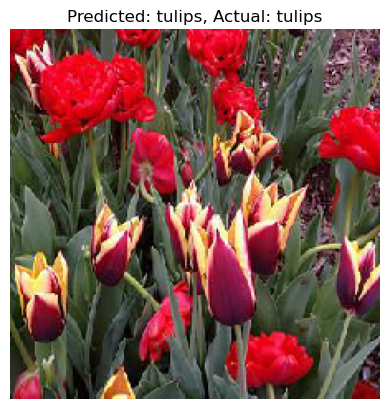

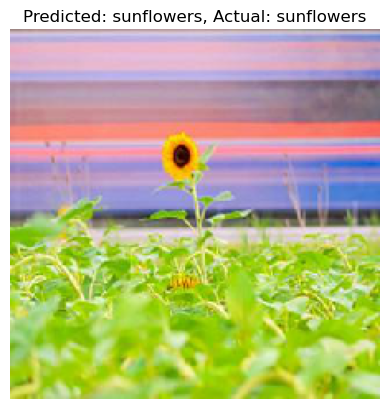

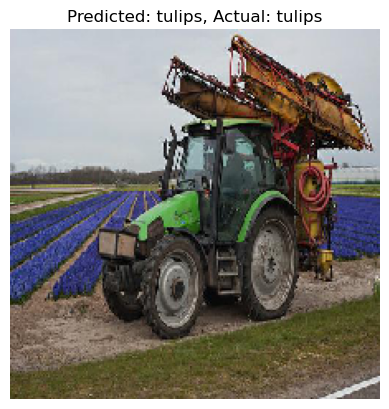

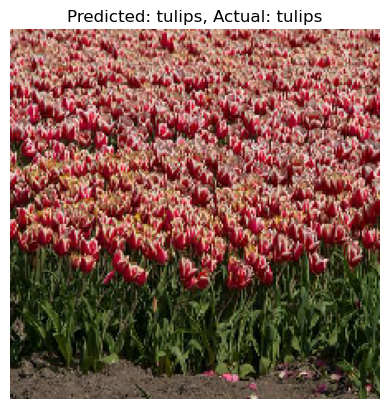

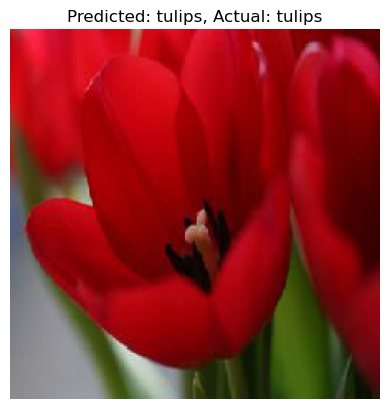

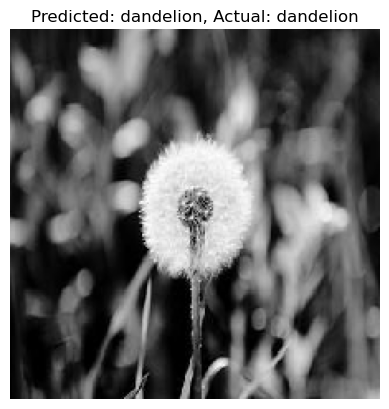

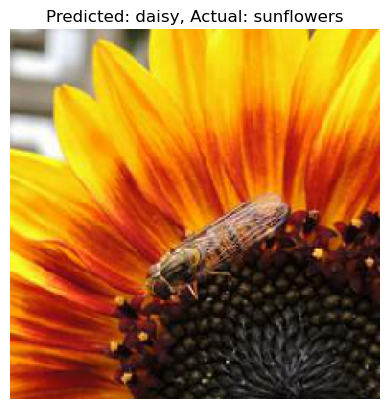

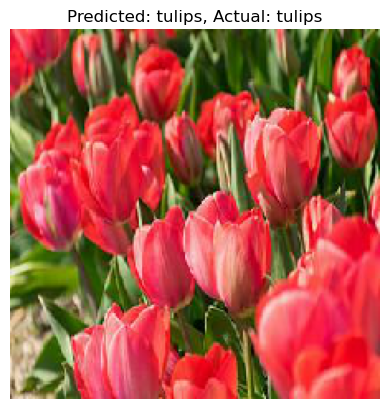

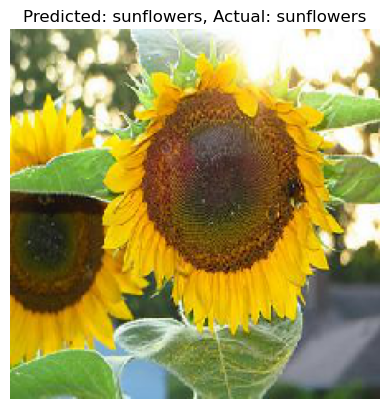

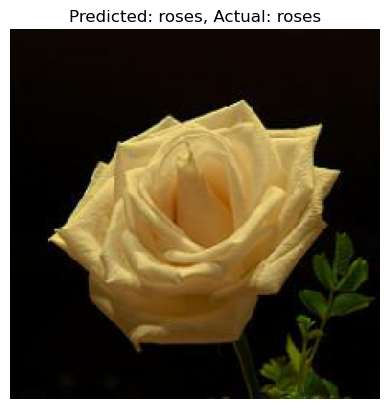

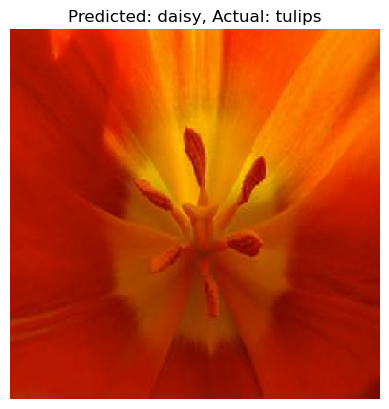

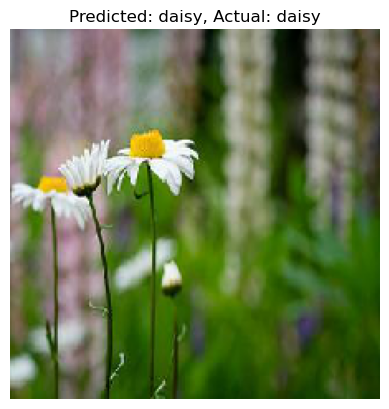

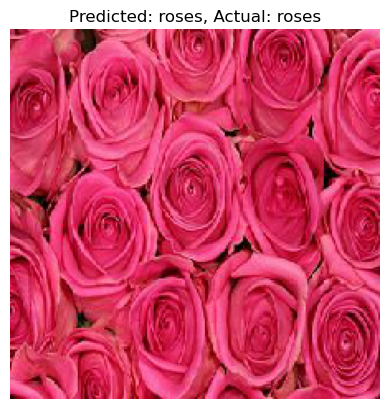

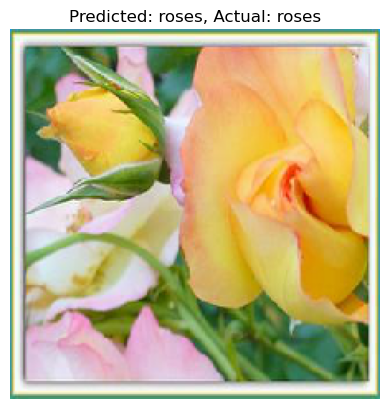

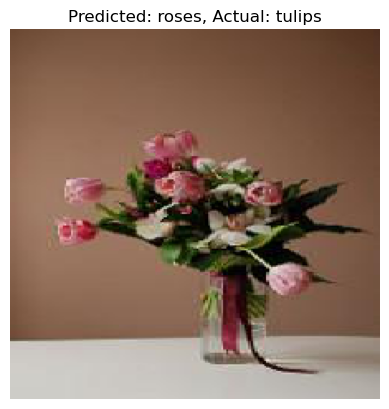

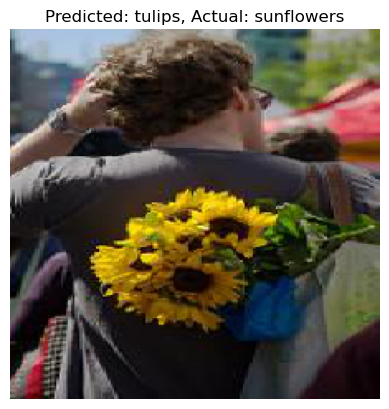

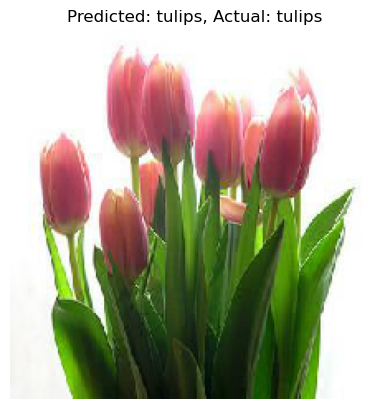

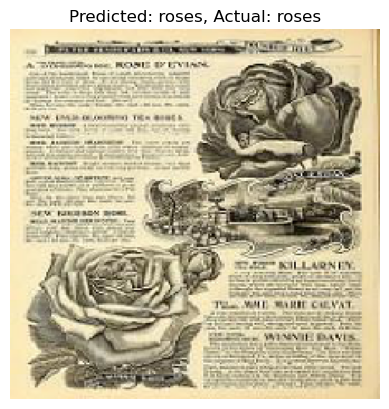

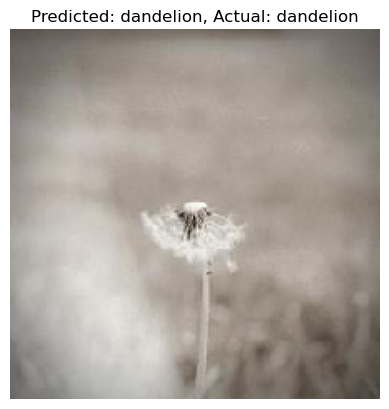

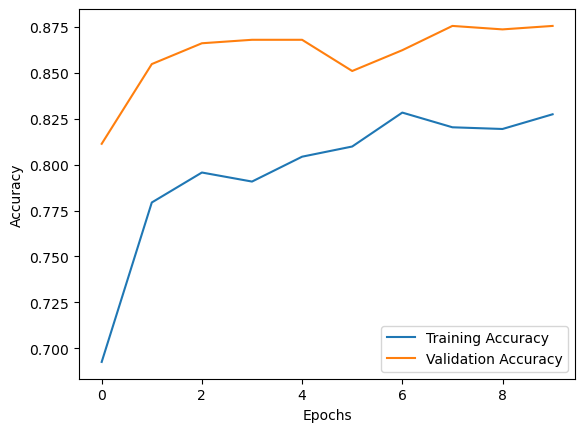

In [2]:
import numpy as np
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

# Make predictions and display images with predictions
class_names = list(test_generator.class_indices.keys())  # Convert to list for indexing

for images, labels in test_generator:
    predictions = model.predict(images)
    for i in range(len(predictions)):
        pred_class = np.argmax(predictions[i])
        true_class = np.argmax(labels[i])
        
        plt.imshow(images[i])
        plt.title(f"Predicted: {class_names[pred_class]}, Actual: {class_names[true_class]}")
        plt.axis('off')
        plt.show()
    break

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()